In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Load the Dataset

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

print('Training Set Shape = {}'.format(df_train.shape))
print('Test Set Shape = {}'.format(df_test.shape))


Training Set Shape = (7613, 5)
Test Set Shape = (3263, 4)


In [4]:
df_train.head()
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Initial Overview

In [5]:
df_train["length"] = df_train["text"].apply(lambda x : len(x))
df_test["length"] = df_test["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(df_train["length"].describe())
print()

print("Test Length Stat")
print(df_test["length"].describe())

Train Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

Test Length Stat
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64


Check for Missing Values

In [6]:
# Check for missing values in training and test sets
print("Missing values in training set:")
print(df_train.isnull().sum())

print("\nMissing values in test set:")
print(df_test.isnull().sum())


Missing values in training set:
id             0
keyword       61
location    2533
text           0
target         0
length         0
dtype: int64

Missing values in test set:
id             0
keyword       26
location    1105
text           0
length         0
dtype: int64


Overview of Data Types

In [7]:
print("\nData types in training set:")
print(df_train.dtypes)

print("\nData types in test set:")
print(df_test.dtypes)


Data types in training set:
id           int64
keyword     object
location    object
text        object
target       int64
length       int64
dtype: object

Data types in test set:
id           int64
keyword     object
location    object
text        object
length       int64
dtype: object


Target Variable Distribution

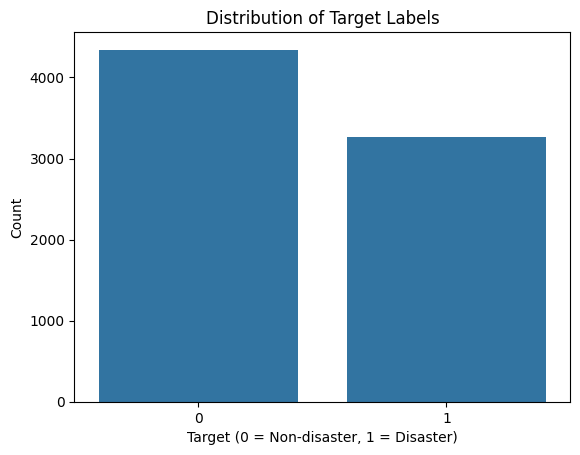

In [8]:
sns.countplot(x=df_train["target"])
plt.title("Distribution of Target Labels")
plt.xlabel("Target (0 = Non-disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.show()

Check for duplicate rows

In [9]:
print("Number of duplicate rows in train set:", df_train.duplicated().sum())
print("Number of duplicate rows in test set:", df_test.duplicated().sum())

# If duplicates exist, we can drop them
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()


Number of duplicate rows in train set: 0
Number of duplicate rows in test set: 0


Inspect Text Data

In [10]:
print("\nSample Non-disaster Tweets:")
print(df_train[df_train["target"] == 0]["text"].sample(5).tolist())

print("\nSample Disaster Tweets:")
print(df_train[df_train["target"] == 1]["text"].sample(5).tolist())


Sample Non-disaster Tweets:
['He better than Sean bro. I can admit that Sean is flames now. But he better than Sean https://t.co/aomQ1RYKmJ', 'ME says many of these wounds could be fatal some rather quickly others slower and a couple not lethal at all. #KerrickTrial', 'Dysfunctional McConnell plans on holding Judicial Nominations hostage. Another example of how GOP can\x89Ûªt govern. http://t.co/VT2akY5MgK \x89Û_', "Man why hasn't @machinegunkelly blown up? He's still underground.", 'Let\x89Ûªs talk some more about your goof guild Saunders. Come right up here on stage. https://t.co/hkBxxvd9Iw']

Sample Disaster Tweets:
['1.94 earthquake occurred 5km S of Volcano Hawaii at 01:04 UTC! #earthquake #Volcano http://t.co/auf4J4Owj1', '#?? #?? #??? #??? Suicide bomber kills 15 in Saudi security site mosque - Reuters  http://t.co/txg7K2DO9v', "Dante Exum's knee injury could stem Jazz's hoped-for surge back to ... http://t.co/8PIFutrB5U", "PolicyLab is at @CECANF's last public hearing in NYC t

Word Cloud for Disaster vs. Non-Disaster Tweets

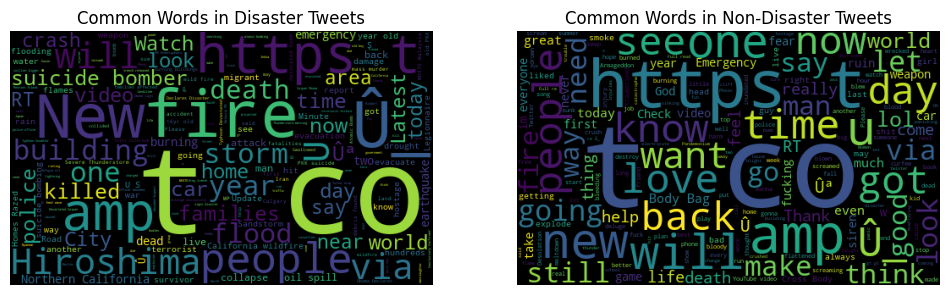

In [11]:
from wordcloud import WordCloud

# Combine text from each class
disaster_text = " ".join(df_train[df_train["target"] == 1]["text"])
non_disaster_text = " ".join(df_train[df_train["target"] == 0]["text"])

# Generate word clouds
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color="black").generate(disaster_text))
plt.title("Common Words in Disaster Tweets")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color="black").generate(non_disaster_text))
plt.title("Common Words in Non-Disaster Tweets")
plt.axis("off")

plt.show()

Most Common Words

In [12]:
from collections import Counter
import itertools

# Tokenizing words
disaster_words = list(itertools.chain(*[tweet.split() for tweet in df_train[df_train["target"] == 1]["text"]]))
non_disaster_words = list(itertools.chain(*[tweet.split() for tweet in df_train[df_train["target"] == 0]["text"]]))

# Most common words
print("Top 10 words in disaster tweets:", Counter(disaster_words).most_common(10))
print("Top 10 words in non-disaster tweets:", Counter(non_disaster_words).most_common(10))

Top 10 words in disaster tweets: [('the', 1051), ('in', 1037), ('of', 888), ('a', 730), ('to', 706), ('and', 462), ('-', 389), ('on', 386), ('for', 368), ('is', 302)]
Top 10 words in non-disaster tweets: [('the', 1524), ('a', 1115), ('to', 1099), ('I', 938), ('and', 840), ('of', 834), ('in', 720), ('you', 529), ('is', 512), ('for', 452)]


Token Length Distribution

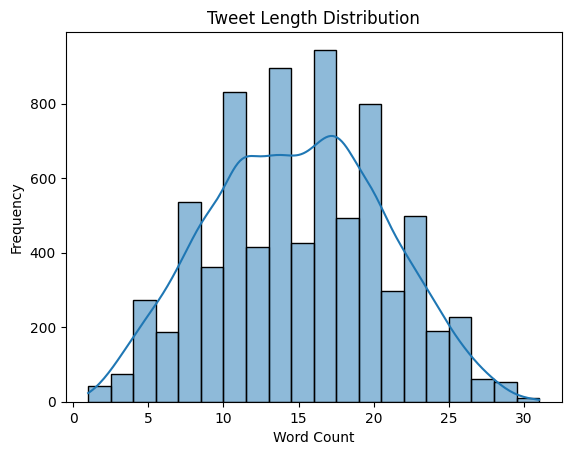

In [13]:
df_train["word_count"] = df_train["text"].apply(lambda x: len(x.split()))
df_test["word_count"] = df_test["text"].apply(lambda x: len(x.split()))

sns.histplot(df_train["word_count"], bins=20, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

Hashtag and Mention Analysis

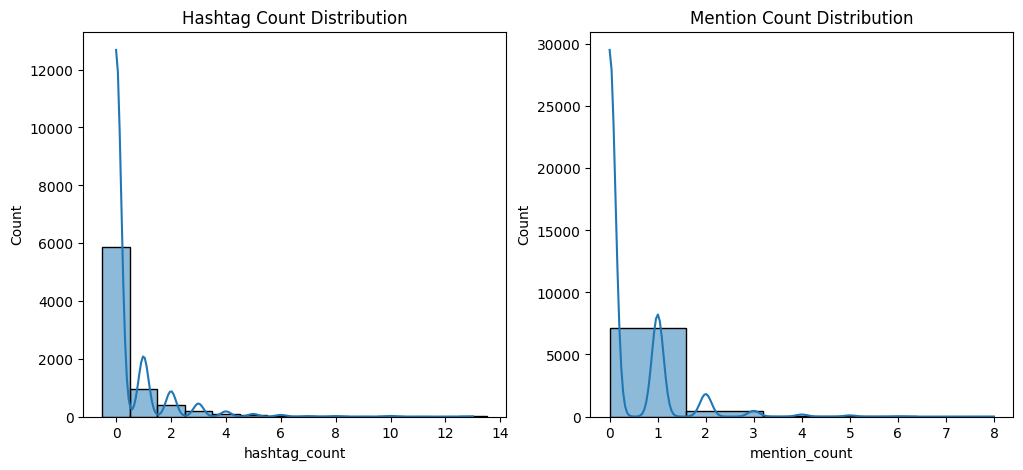

In [14]:
df_train["hashtag_count"] = df_train["text"].apply(lambda x: x.count("#"))
df_train["mention_count"] = df_train["text"].apply(lambda x: x.count("@"))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_train["hashtag_count"], bins=5, kde=True, discrete=True)
plt.title("Hashtag Count Distribution")

plt.subplot(1,2,2)
sns.histplot(df_train["mention_count"], bins=5, kde=True)
plt.title("Mention Count Distribution")

plt.show()


Check for URLs in Tweets

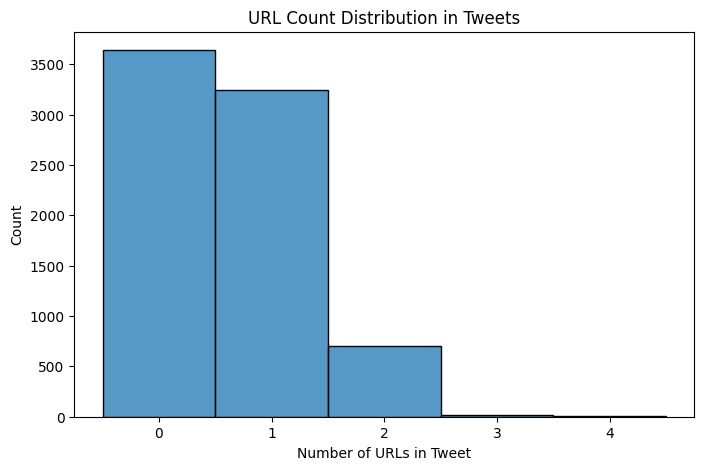

In [15]:
df_train["url_count"] = df_train["text"].apply(lambda x: x.count("http"))

# Plot histogram with integer bins
plt.figure(figsize=(8,5))
sns.histplot(df_train["url_count"], bins=range(df_train["url_count"].max() + 2), discrete=True)

plt.title("URL Count Distribution in Tweets")
plt.xlabel("Number of URLs in Tweet")
plt.ylabel("Count")
plt.xticks(range(df_train["url_count"].max() + 1))  # Ensure x-axis has only integers
plt.show()

Keyword Analysis

In [18]:
keyword_counts = df_train["keyword"].value_counts()
print(keyword_counts.head(10))  # Show top 10 most common keywords


keyword
fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
harm           41
sinking        41
evacuate       40
outbreak       40
fear           40
Name: count, dtype: int64


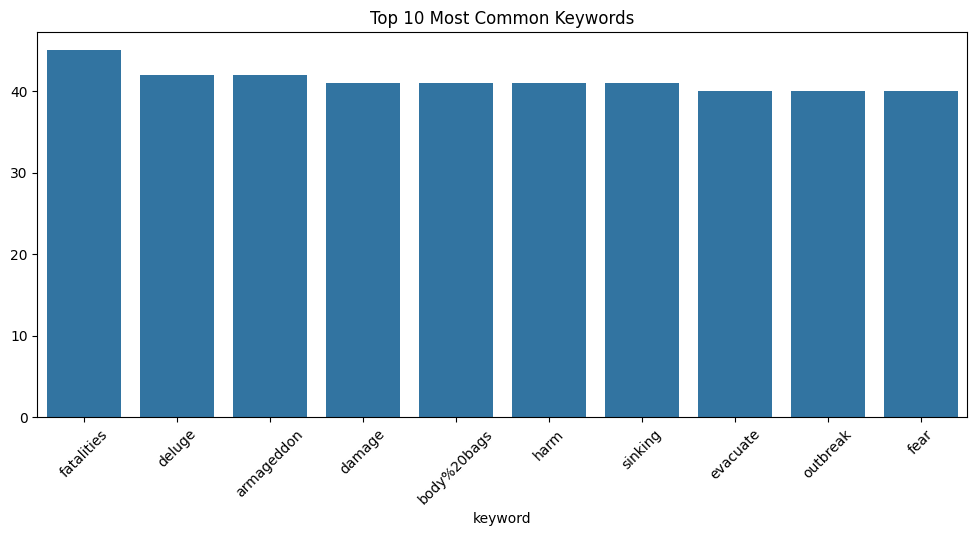

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.barplot(x=keyword_counts[:10].index, y=keyword_counts[:10].values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Keywords")
plt.show()


Location Analysis

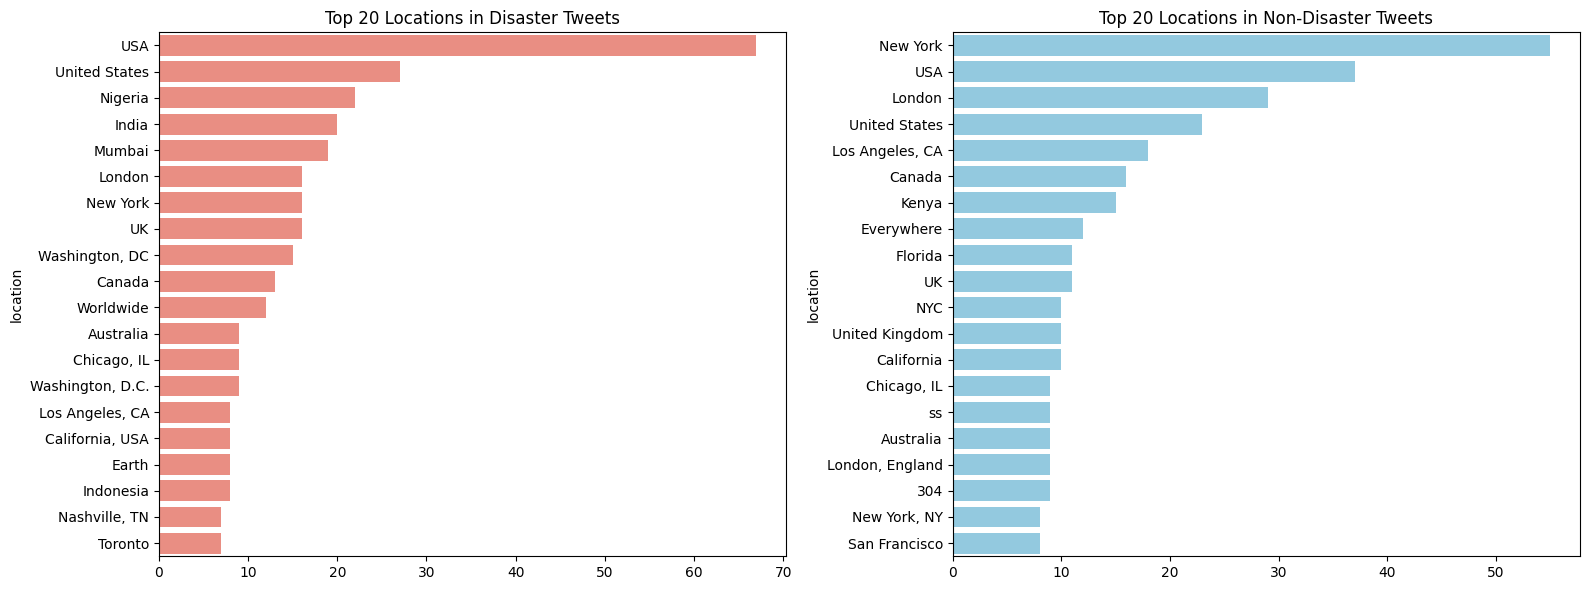

In [22]:
# Top 20 locations for disaster and non-disaster tweets
top_disaster_locations = df_train[df_train['target'] == 1]['location'].value_counts().head(20)
top_nondisaster_locations = df_train[df_train['target'] == 0]['location'].value_counts().head(20)

# Plotting the top locations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(y=top_disaster_locations.index, x=top_disaster_locations.values, ax=axes[0], color='salmon')
axes[0].set_title('Top 20 Locations in Disaster Tweets')
sns.barplot(y=top_nondisaster_locations.index, x=top_nondisaster_locations.values, ax=axes[1], color='skyblue')
axes[1].set_title('Top 20 Locations in Non-Disaster Tweets')
plt.tight_layout()
plt.show()

In [24]:
from textblob import TextBlob

df_train['polarity'] = df_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_train['subjectivity'] = df_train['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

print("Sentiment Analysis on Disaster Tweets:")
print(df_train[df_train['target'] == 1][['polarity', 'subjectivity']].describe())


Sentiment Analysis on Disaster Tweets:
          polarity  subjectivity
count  3271.000000   3271.000000
mean      0.018631      0.265129
std       0.239165      0.316988
min      -1.000000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.100000
75%       0.062500      0.500000
max       1.000000      1.000000


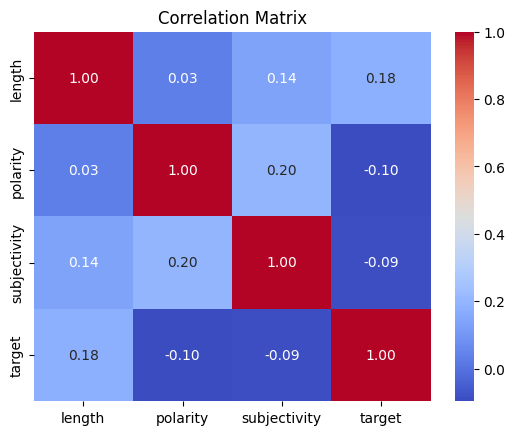

In [26]:
import seaborn as sns

corr_matrix = df_train[['length', 'polarity', 'subjectivity', 'target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Word Distribution Visualization

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top bigrams
disaster_bigrams = get_top_ngrams(df_train[df_train['target'] == 1]['text'], ngram_range=(2, 2), n=10)
nondisaster_bigrams = get_top_ngrams(df_train[df_train['target'] == 0]['text'], ngram_range=(2, 2), n=10)

print("Top Bigrams in Disaster Tweets:", disaster_bigrams)
print("Top Bigrams in Non-Disaster Tweets:", nondisaster_bigrams)

Top Bigrams in Disaster Tweets: [('û_ http', np.int64(109)), ('suicide bomber', np.int64(59)), ('northern california', np.int64(41)), ('oil spill', np.int64(38)), ('burning buildings', np.int64(37)), ('suicide bombing', np.int64(35)), ('california wildfire', np.int64(34)), ('70 years', np.int64(30)), ('bomber detonated', np.int64(30)), ('confirmed mh370', np.int64(29))]
Top Bigrams in Non-Disaster Tweets: [('û_ http', np.int64(108)), ('cross body', np.int64(39)), ('youtube video', np.int64(36)), ('liked youtube', np.int64(35)), ('video http', np.int64(27)), ('body bag', np.int64(27)), ('gt gt', np.int64(26)), ('û_ https', np.int64(24)), ('body bagging', np.int64(24)), ('burning buildings', np.int64(23))]


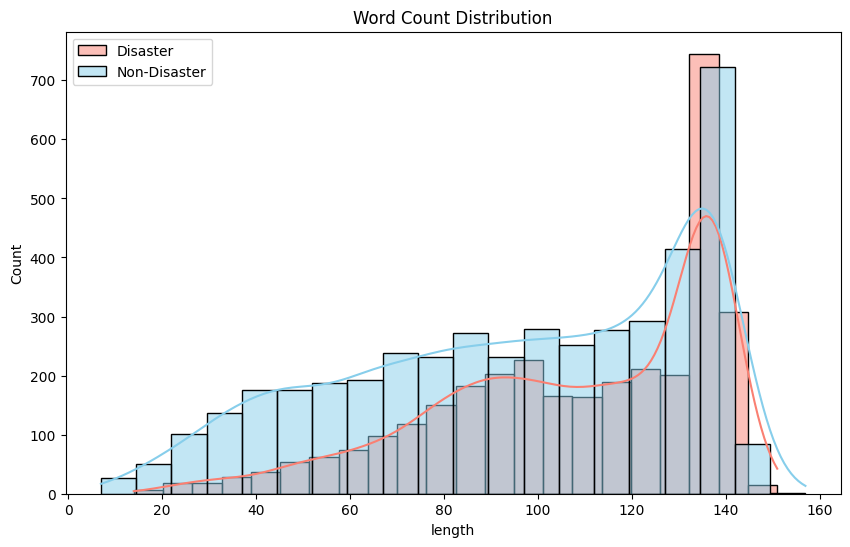

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train[df_train['target'] == 1]['length'], color='salmon', label='Disaster', kde=True)
sns.histplot(df_train[df_train['target'] == 0]['length'], color='skyblue', label='Non-Disaster', kde=True)
plt.title('Word Count Distribution')
plt.legend()
plt.show()